Η καλύτερη ευθεία είναι y = 1.91 + 1.04x
Χ^2 = 8.72, Πιθανότητα Χ^2 = 0.00
y για x=2 είναι y0=3.98 με αβεβαιότητα ey0=0.04


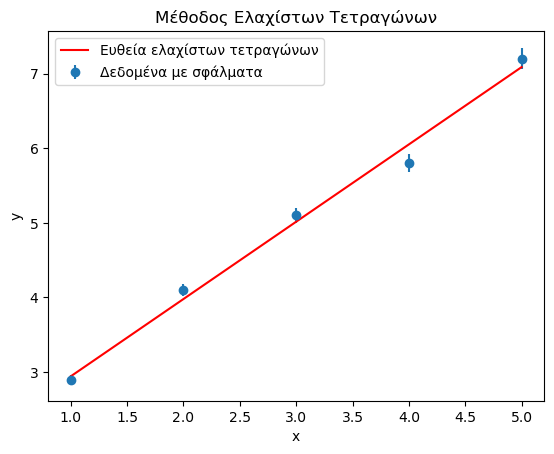

In [3]:
#Exercise 1
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.special import ndtr
from math import pi, exp, sqrt

# Αρχικοποίηση του τυχαίου αριθμού για αναπαραγωγιμότητα
np.random.seed(42)

# Δημιουργία των δεδομένων
x = np.array([1.0, 2.0, 3.0, 4.0, 5.0])
y = np.array([2.9, 4.1, 5.1, 5.8, 7.2])
ey = np.zeros(len(y))

for i in range(len(y)):
    ey[i] = 0.02 * y[i]
# Υπολογισμός των αθροισμάτων για τη μέθοδο ελαχίστων τετραγώνων
Wx = np.sum(x / ey**2)
Wy = np.sum(y / ey**2)
Wxx = np.sum((x**2) / ey**2)
Wxy = np.sum((x * y) / ey**2)
Wd = np.sum(1 / ey**2)

Wx /= Wd
Wy /= Wd
Wxx /= Wd
Wxy /= Wd

# Υπολογισμός συντελεστών γραμμικής παλινδρόμησης
b = (Wxy - Wx * Wy) / (Wxx - Wx * Wx)
a = Wy - b * Wx

# Υπολογισμός πίνακα συνδιασποράς
Ws = 1 / (Wxx - Wx * Wx) / Wd
Va = Ws * Wxx
Vb = Ws
COVab = -Wx * Ws

# Υπολογισμός του ελαχίστου χ^2
chisq = np.sum(((a + b * x - y) ** 2) / (ey ** 2))

# Υπολογισμός πιθανότητας χ^2 με Ν-2 βαθμούς ελευθερίας
probchisq = ndtr(-sqrt(chisq))  # Ενσωματωμένη συνάρτηση κατανομής της κανονικής κατανομής

# Εκτύπωση των αποτελεσμάτων
print(f"Η καλύτερη ευθεία είναι y = {a:.2f} + {b:.2f}x")
print(f"Χ^2 = {chisq:.2f}, Πιθανότητα Χ^2 = {probchisq:.2f}")

# Υπολογισμός τιμής y για x=2 και της αβεβαιότητάς της
x0 = 2
y0 = a + b * x0
ey0 = sqrt(Va + Vb * x0**2 + 2 * COVab * x0)

print(f"y για x={x0} είναι y0={y0:.2f} με αβεβαιότητα ey0={ey0:.2f}")

# Οπτικοποίηση των δεδομένων και της ευθείας παλινδρόμησης
plt.errorbar(x, y, yerr=ey, fmt='o', label='Δεδομένα με σφάλματα')
plt.plot(x, a + b * x, color='red', label='Ευθεία ελαχίστων τετραγώνων')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Μέθοδος Ελαχίστων Τετραγώνων')
plt.show()


Η καλύτερη εκτίμηση για τη σταθερά b είναι b = 1.99
Χ^2 = 36.91, Πιθανότητα Χ^2 = 0.00


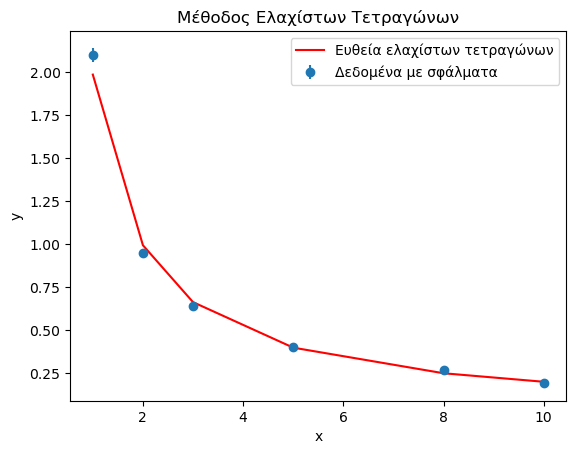

In [9]:
#Exercise 2
import numpy as np
import matplotlib.pyplot as plt

# Δεδομένα
x = np.array([1.0, 2.0, 3.0, 5.0, 8.0, 10.0])
y = np.array([2.10, 0.95, 0.64, 0.40, 0.27, 0.19])
dy = np.zeros(len(y))

for i in range(len(y)):
    dy[i] = 0.02 * y[i]
# Μετατροπή των x σε x' = 1/x
x_prime = 1 / x

# Μέθοδος ελαχίστων τετραγώνων
Wx = np.sum(x_prime / dy**2)
Wy = np.sum(y / dy**2)
Wxx = np.sum((x_prime**2) / dy**2)
Wxy = np.sum((x_prime * y) / dy**2)
Wd = np.sum(1 / dy**2)

Wx /= Wd
Wy /= Wd
Wxx /= Wd
Wxy /= Wd

# Υπολογισμός της σταθεράς b
b = Wxy / Wxx

# Υπολογισμός πίνακα συνδιασποράς
Ws = 1 / Wxx / Wd
Vb = Ws

# Υπολογισμός του ελαχίστου χ^2
chisq = np.sum(((b * x_prime - y) ** 2) / (dy ** 2))

# Υπολογισμός πιθανότητας χ^2 με N-1 βαθμούς ελευθερίας
from scipy.stats import chi2
probchisq = 1 - chi2.cdf(chisq, df=len(x)-1)

# Εκτύπωση των αποτελεσμάτων
print(f"Η καλύτερη εκτίμηση για τη σταθερά b είναι b = {b:.2f}")
print(f"Χ^2 = {chisq:.2f}, Πιθανότητα Χ^2 = {probchisq:.2f}")

# Υπολογισμός προβλεπόμενων τιμών y
y_pred = b * x_prime

# Οπτικοποίηση των δεδομένων και της ευθείας παλινδρόμησης
plt.errorbar(x, y, yerr=dy, fmt='o', label='Δεδομένα με σφάλματα')
plt.plot(x, y_pred, color='red', label='Ευθεία ελαχίστων τετραγώνων')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Μέθοδος Ελαχίστων Τετραγώνων')
plt.show()
